<a href="https://colab.research.google.com/github/SunilMali-158/stock-price-prediction/blob/main/Apple_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
from talib.abstract import *
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as stats

#mpl.rcParams['figure.figsize'] = (8,6)
#mpl.rcParams['axes.grid'] = True

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [135]:
from google.colab import files


uploaded = files.upload()


Saving HistoricalData_APPLE.csv to HistoricalData_APPLE (3).csv


In [136]:
# Import data using datetime and no data value
df = pd.read_csv('HistoricalData_APPLE (3).csv')

# View first few rows
df.head(6)

,Date,Close,Volume,Open,High,Low
0,06-09-2021,127.13,56877940,$127.21,127.75,126.5200
1,06-08-2021,126.74,74403770,$126.6,128.46,126.2101
2,06-07-2021,125.90,71057550,$126.17,126.32,124.8321
3,06-04-2021,125.89,75169340,$124.07,126.16,123.8500
4,06-03-2021,123.54,76229170,$124.68,124.85,123.1300
5,06-02-2021,125.06,59278860,$124.28,125.24,124.0500


In [138]:
def to_datetime(stock):
  
  stock['Date'] = pd.to_datetime(stock['Date'])
  stock.set_index('Date', inplace=True, drop=False)
  return stock

In [140]:
print("Train data shape : ", df.shape)   

df = to_datetime(df)


Train data shape :  (2516, 6)


In [141]:
df.index

DatetimeIndex(['2021-06-09', '2021-06-08', '2021-06-07', '2021-06-04',
               '2021-06-03', '2021-06-02', '2021-06-01', '2021-05-28',
               '2021-05-27', '2021-05-26',
               ...
               '2011-06-23', '2011-06-22', '2011-06-21', '2011-06-20',
               '2011-06-17', '2011-06-16', '2011-06-15', '2011-06-14',
               '2011-06-13', '2011-06-10'],
              dtype='datetime64[ns]', name='Date', length=2516, freq=None)

In [166]:
df.index=pd.to_datetime(df.index)
df.index

DatetimeIndex(['2021-06-09', '2021-06-08', '2021-06-07', '2021-06-04',
               '2021-06-03', '2021-06-02', '2021-06-01', '2021-05-28',
               '2021-05-27', '2021-05-26',
               ...
               '2011-06-23', '2011-06-22', '2011-06-21', '2011-06-20',
               '2011-06-17', '2011-06-16', '2011-06-15', '2011-06-14',
               '2011-06-13', '2011-06-10'],
              dtype='datetime64[ns]', name='Date', length=2516, freq=None)

In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,2516.0,4.127828e+01,3.030481e+01,1.126000e+01,2.121750e+01,2.959500e+01,4.773500e+01,1.431600e+02
Volume,2516.0,2.388826e+08,1.914594e+08,4.544820e+07,1.092658e+08,1.679334e+08,3.022477e+08,1.498071e+09
High,2516.0,4.169847e+01,3.069859e+01,1.134640e+01,2.142360e+01,2.981000e+01,4.799625e+01,1.450900e+02
Low,2516.0,4.082985e+01,2.989347e+01,1.108930e+01,2.099280e+01,2.928125e+01,4.737125e+01,1.413700e+02


In [144]:
df.shape

(2516, 6)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2021-06-09 to 2011-06-10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2516 non-null   datetime64[ns]
 1   Close   2516 non-null   float64       
 2   Volume  2516 non-null   int64         
 3   Open    2516 non-null   object        
 4   High    2516 non-null   float64       
 5   Low     2516 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 137.6+ KB


In [167]:
#Plotting the OHLC (Open, High, Low, Close) graph on a daily basis data
fig = go.Figure([go.Ohlc( x = df.Date, open = df.Open, high = df.High, low = df.Low, close = df.Close )])
fig.update(layout_xaxis_rangeslider_visible=True)
fig.update_layout(title = "OHLC GRAPH", xaxis_title = 'Time (2011-2020)', yaxis_title = 'Market Prices of stock')
fig.show()

In [168]:
#Plotting of Close prices 
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter( x = df.Date, y = df.Close, name = 'Close'), row=1, col=1)
fig.update_layout(title = "Plots showing the variation of closing prices")
fig.show()

In [169]:
fig = px.line(df, x = 'Date', y = 'Close', title = 'Close Price over the 2011-2021 period')
fig.update_xaxes(rangeslider_visible = True,
                 rangeselector = dict(buttons = list([dict(count=1, label='1y', step='year', stepmode='backward'),
                                                      dict(count=2, label='2y', step='year', stepmode='backward'),
                                                      dict(count=5, label='5y', step='year', stepmode='backward'),
                                                      dict(step='all')])))
fig.show()

In [179]:
mean = df.Volume.mean()

fig = go.Figure()
fig.add_trace(go.Scatter( x = df.Date, y = df.Volume, name = 'Train data Volume') )
layout = { 'shapes': [{ 'type': 'line', 'x0':str(2010), 'y0':mean, 'x1':str(2021), 'y1':mean, 'line': { 'color':'red', 'width':4 }, }],
           'annotations': [ dict( x=str(2013), y=mean, xref="x", yref="y", text="Mean Value of Volumes" ) ],
           'showlegend': True, 'title':"Volumes of stocks", 'yaxis_title':"Number of stocks traded", 'xaxis_title':"Time (2011-2021)" }

fig['layout'].update(layout)
fig.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


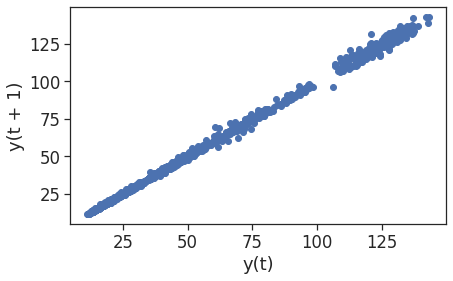

In [150]:
#Auto-Correlation Plot
pd.plotting.lag_plot(df.Close, lag=1)

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_df = df[['Close']]   
y_df= df['Close'].shift(-5)

In [153]:
print("Originally non-null values of train data (X) for apple:")
X_df.info()    
X_df = X_df[199:-5]
print("\n", "After removing NaN values")
X_df.info()    
y_df = y_df[199:-5]
print("\n", "Shape of target var. after removing NaN values :", y_df.shape)

Originally non-null values of train data (X) for apple:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2021-06-09 to 2011-06-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB

 After removing NaN values
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2312 entries, 2020-08-24 to 2011-06-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2312 non-null   float64
dtypes: float64(1)
memory usage: 36.1 KB

 Shape of target var. after removing NaN values : (2312,)


In [154]:
print("Originally non-null values of train data (X) for apple:")
X_df.info()    
X_df = X_df[199:-5]
print("\n", "After removing NaN values")
X_df.info()    
y_df = y_df[199:-5]
print("\n", "Shape of target var. after removing NaN values :", y_df.shape)

Originally non-null values of train data (X) for apple:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2312 entries, 2020-08-24 to 2011-06-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2312 non-null   float64
dtypes: float64(1)
memory usage: 36.1 KB

 After removing NaN values
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2108 entries, 2019-11-07 to 2011-06-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2108 non-null   float64
dtypes: float64(1)
memory usage: 32.9 KB

 Shape of target var. after removing NaN values : (2108,)


In [180]:
print("First 5 rows of train data (X) of apple :")
print(X_df.head())
print("\n", "First 5 rows of train data (Y) of apple :")
print(y_df.head())
print("\n", "Last 5 rows of train data of apple :")
print(X_df.tail())
print("\n", "Last 5 rows of train data (Y) of apple :")
print(y_df.tail())

First 5 rows of train data (X) of apple :
            Close
Date             
2019-11-07  64.86
2019-11-06  64.31
2019-11-05  64.28
2019-11-04  64.38
2019-11-01  63.96

 First 5 rows of train data (Y) of apple :
Date
2019-11-07    62.19
2019-11-06    60.82
2019-11-05    60.82
2019-11-04    62.26
2019-11-01    61.65
Name: Close, dtype: float64

 Last 5 rows of train data of apple :
            Close
Date             
2011-06-30  11.99
2011-06-29  11.93
2011-06-28  11.97
2011-06-27  11.86
2011-06-24  11.66

 Last 5 rows of train data (Y) of apple :
Date
2011-06-30    11.83
2011-06-29    11.52
2011-06-28    11.62
2011-06-27    11.26
2011-06-24    11.44
Name: Close, dtype: float64


In [156]:
X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.2, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [186]:
train_lr = LinearRegression().fit(X_train_scaled, y_train)
y_pred = lr.predict(X_val_scaled)
print("Train score : ", lr.score(X_train_scaled, y_train))
print("Validation score : ", lr.score(X_val_scaled, y_val))
print("mean absolute error : ", mean_absolute_error(y_val, y_pred))

Train score :  0.9914371156337217
Validation score :  0.9916960583518987
mean absolute error :  0.7867937726821135
